In [1]:
import pandas as pd
import numpy as np
import sys

import warnings
warnings.filterwarnings('ignore')

In [2]:
sys.path.append('..')

In [3]:
from network.util import read_graph, get_graph_statistics_and_visualizations, plot_graph
from difussion.threshold import ThresholdModel

In [4]:
graph, _ = read_graph('../data/healthy_food_posts/edge_data.csv', 'weight', 'user_owner', 'user_other')

In [5]:
edges, nodes = graph.edges(), graph.nodes()

In [6]:
nodes

NodeView(('3natives', 'hellospoonful', 'aboutmindfulliving', 'boozechewsviews', 'acaibowlss', 'themindbodyblueprint', 'acefitness', 'actidad', 'seangarner', 'adidasnyc', 'savjimenez', 'adidasoriginals', 'agaci_store', 'fionahx3', 'aldiusa', 'bearnecessities___', 'ddotts_', 'alexandrabirza', 'andyandra', 'alissa_explainsitall', 'coffeeandchampagne', 'amazonfashion', 'paileaa', 'amazonfashioneu', 'ambrosianaturalfoods', 'desiliciousrd', 'americaneagle', 'coffeewithrosa', 'americanstyle', 'peyton_mabry', 'andotherstories', 'anotheroutfitpost', 'anacelinexo', 'y.a.t.r.i', 'anthro_paloalto', 'stephanieinthecity', 'anthro_sanfrancisco', 'anthropologie', 'kimjeanny', 'aquaphorus', 'blonde_vibe', 'arilanskincare', 'yarinayy', 'asos', 'simran', 'astridandmiyu', 'worldofannna', 'atlantabestbites', 'australianeggs', 'the_nutritionguy', 'avomuse', 'bandier', 'samiclarke', 'banksia_bistro', 'the_chew_crew', 'barked', 'madpupmattis', 'barneybutter', 'liveliftlove89', 'basic_books', 'busygirlhealth',

In [7]:
edges

OutEdgeView([('3natives', 'hellospoonful'), ('aboutmindfulliving', 'boozechewsviews'), ('acaibowlss', 'themindbodyblueprint'), ('acefitness', 'hellospoonful'), ('actidad', 'seangarner'), ('adidasnyc', 'savjimenez'), ('adidasoriginals', 'savjimenez'), ('agaci_store', 'fionahx3'), ('aldiusa', 'bearnecessities___'), ('aldiusa', 'ddotts_'), ('alexandrabirza', 'andyandra'), ('alissa_explainsitall', 'coffeeandchampagne'), ('amazonfashion', 'paileaa'), ('amazonfashioneu', 'paileaa'), ('ambrosianaturalfoods', 'desiliciousrd'), ('americaneagle', 'coffeewithrosa'), ('americanstyle', 'peyton_mabry'), ('andotherstories', 'paileaa'), ('anotheroutfitpost', 'anacelinexo'), ('anotheroutfitpost', 'y.a.t.r.i'), ('anthro_paloalto', 'stephanieinthecity'), ('anthro_sanfrancisco', 'stephanieinthecity'), ('anthropologie', 'kimjeanny'), ('anthropologie', 'stephanieinthecity'), ('aquaphorus', 'blonde_vibe'), ('arilanskincare', 'yarinayy'), ('asos', 'simran'), ('astridandmiyu', 'worldofannna'), ('atlantabestbit

The graph has 830 nodes
The graph has 756 edges
The graph has a maximum node degree of 20
The graph has a maximum in-degree of 20
The graph has a maximum out-degree of 7
The average clustering coefficient of the graph is: 0.0


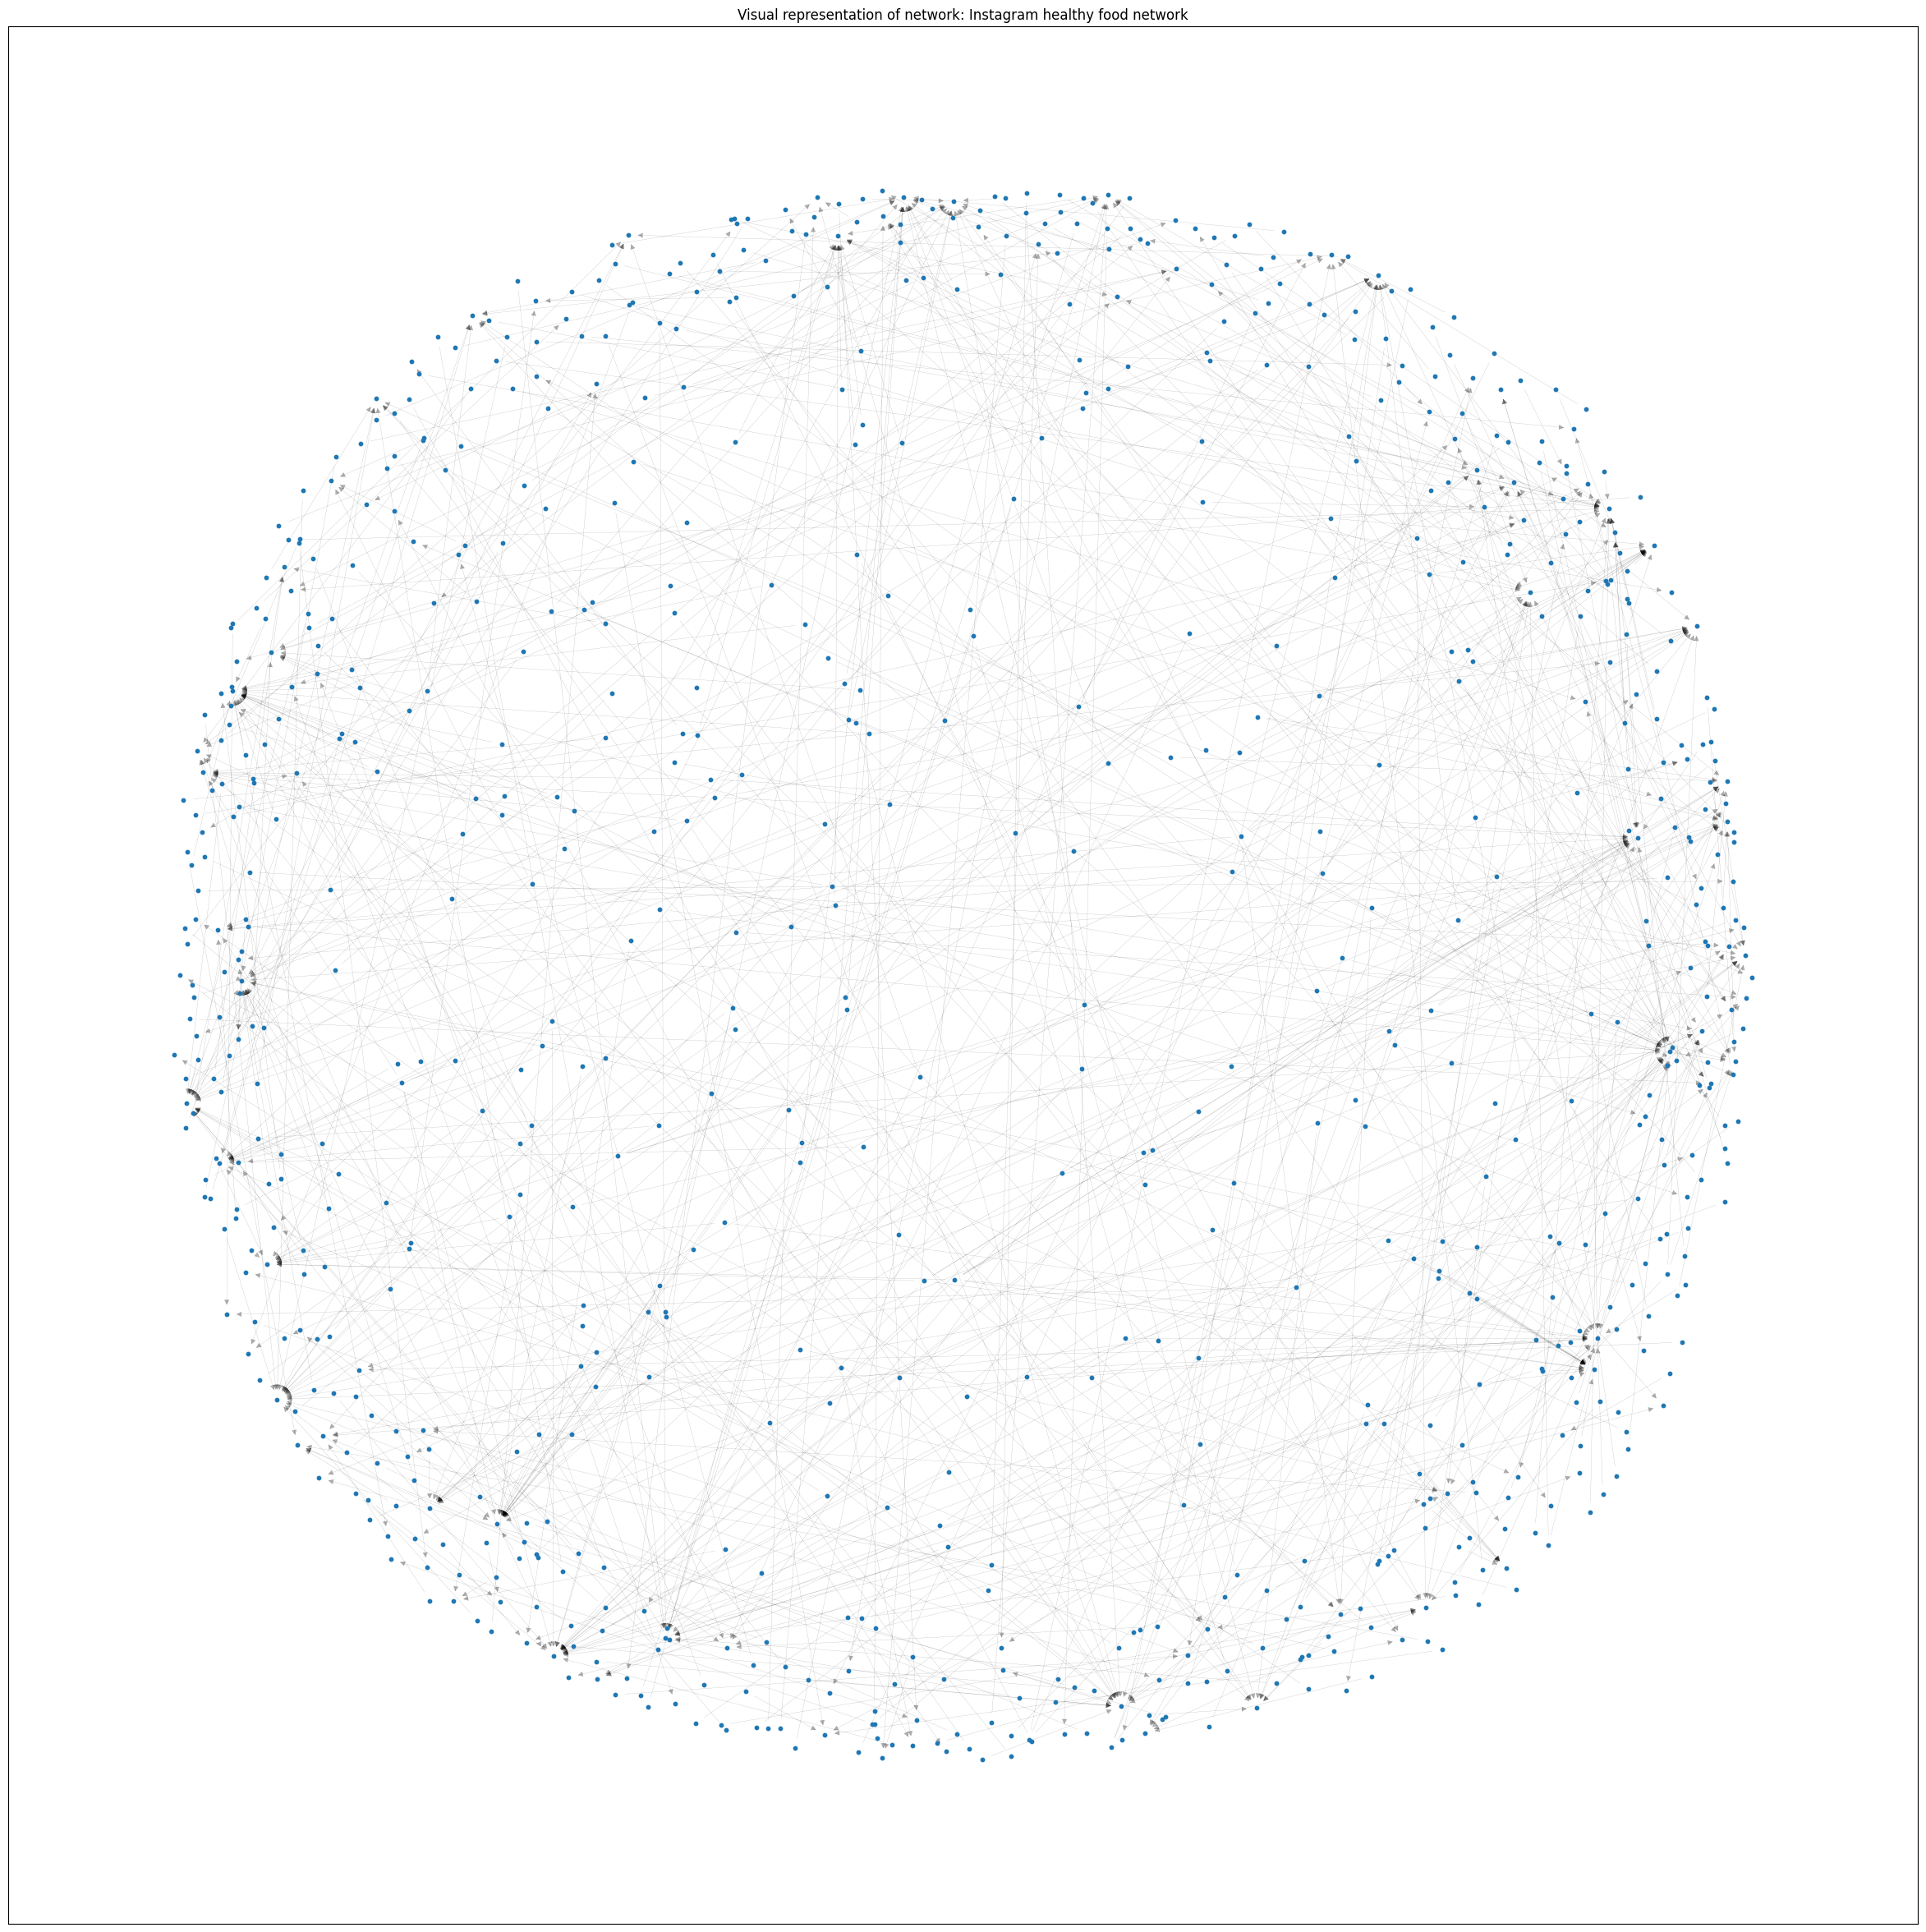

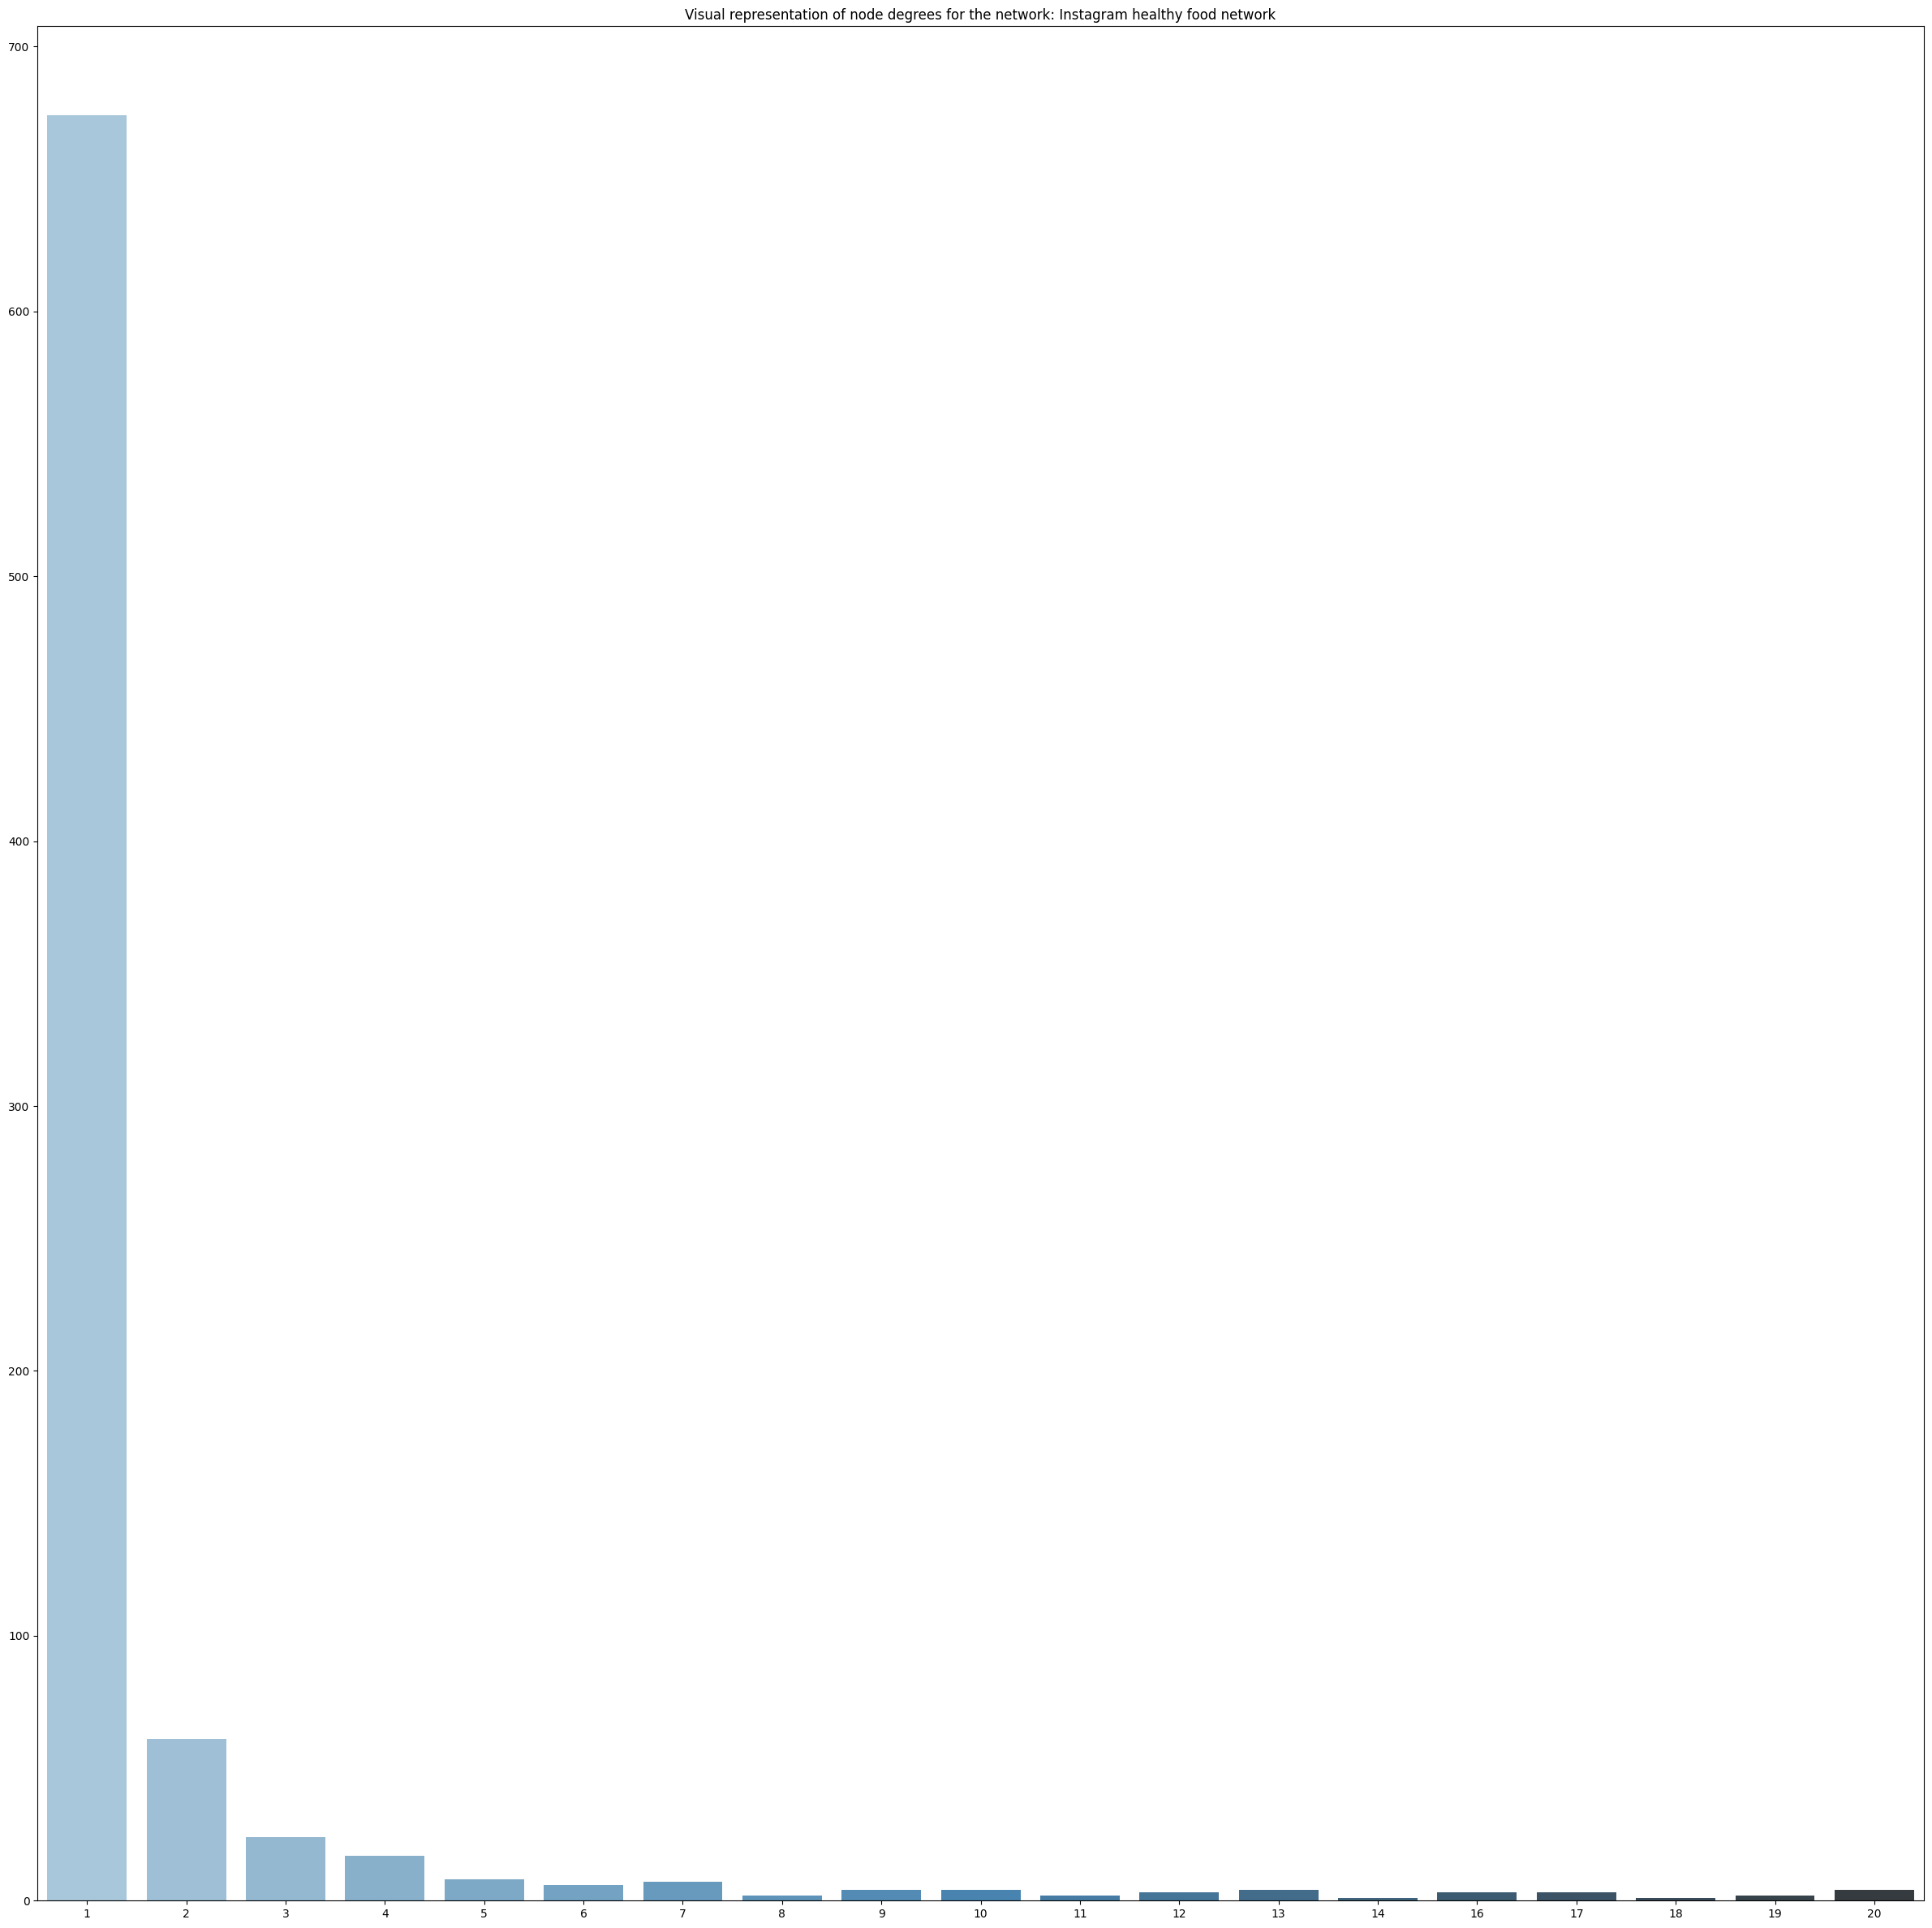

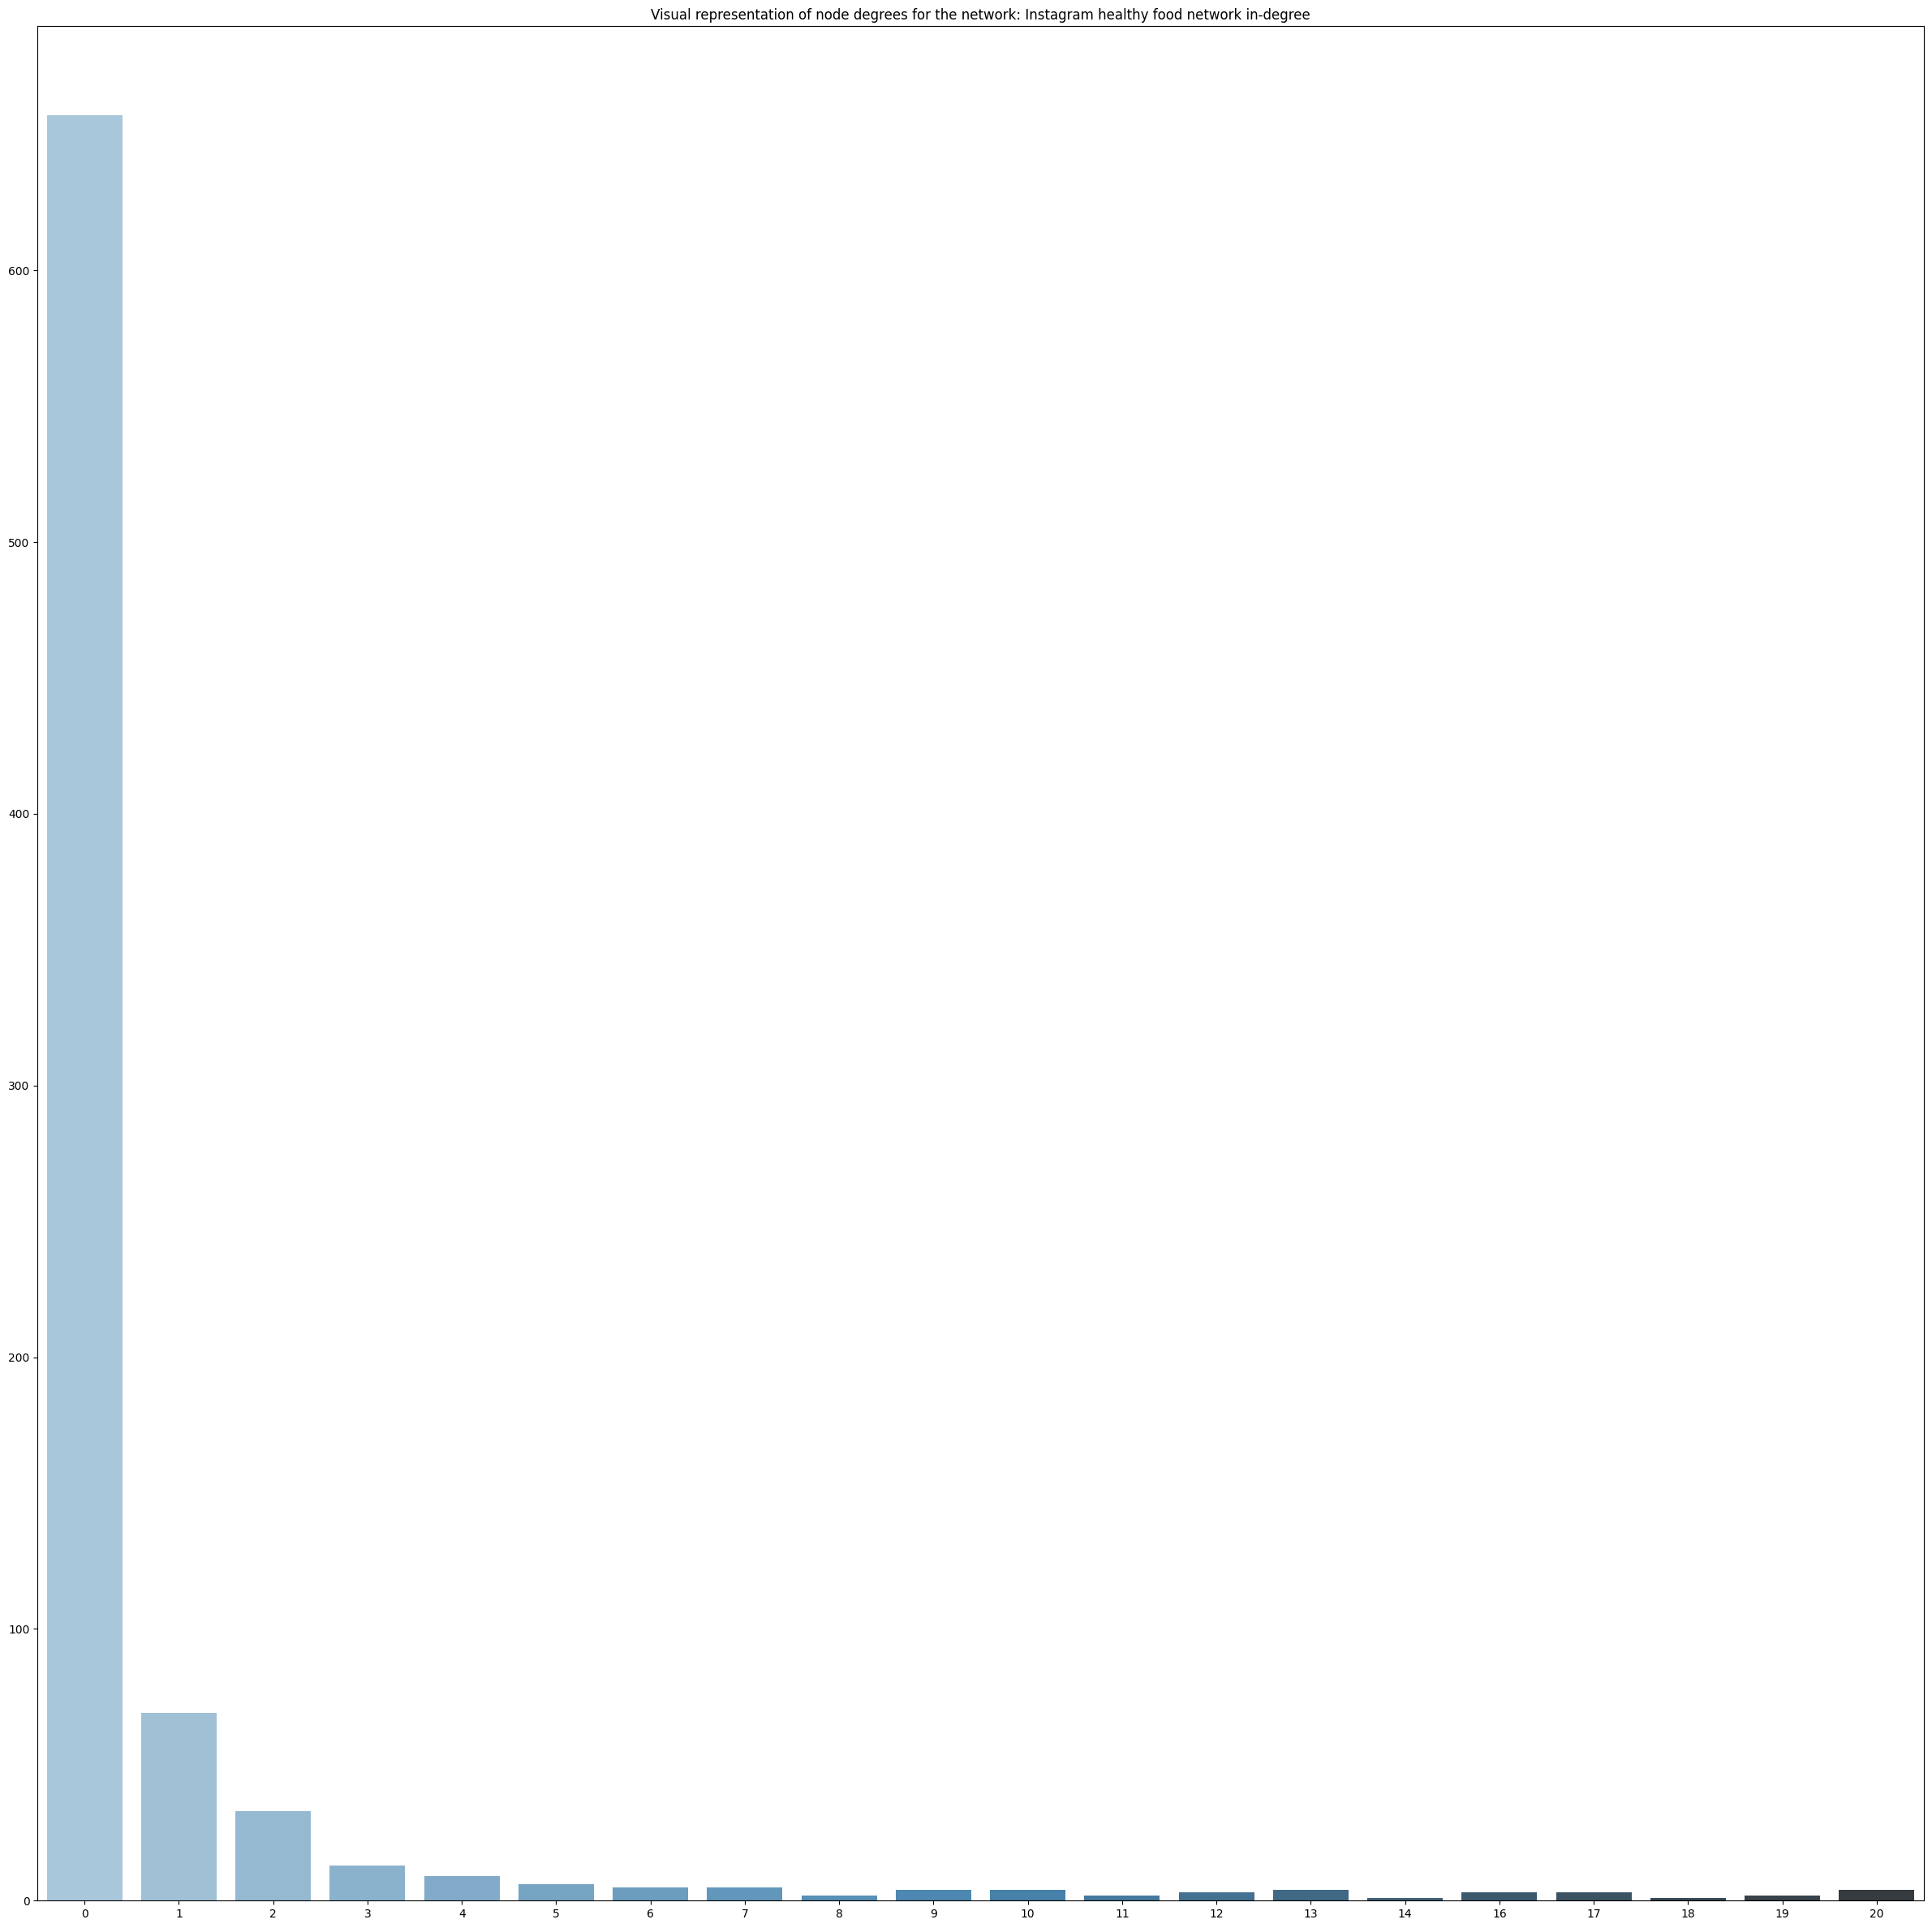

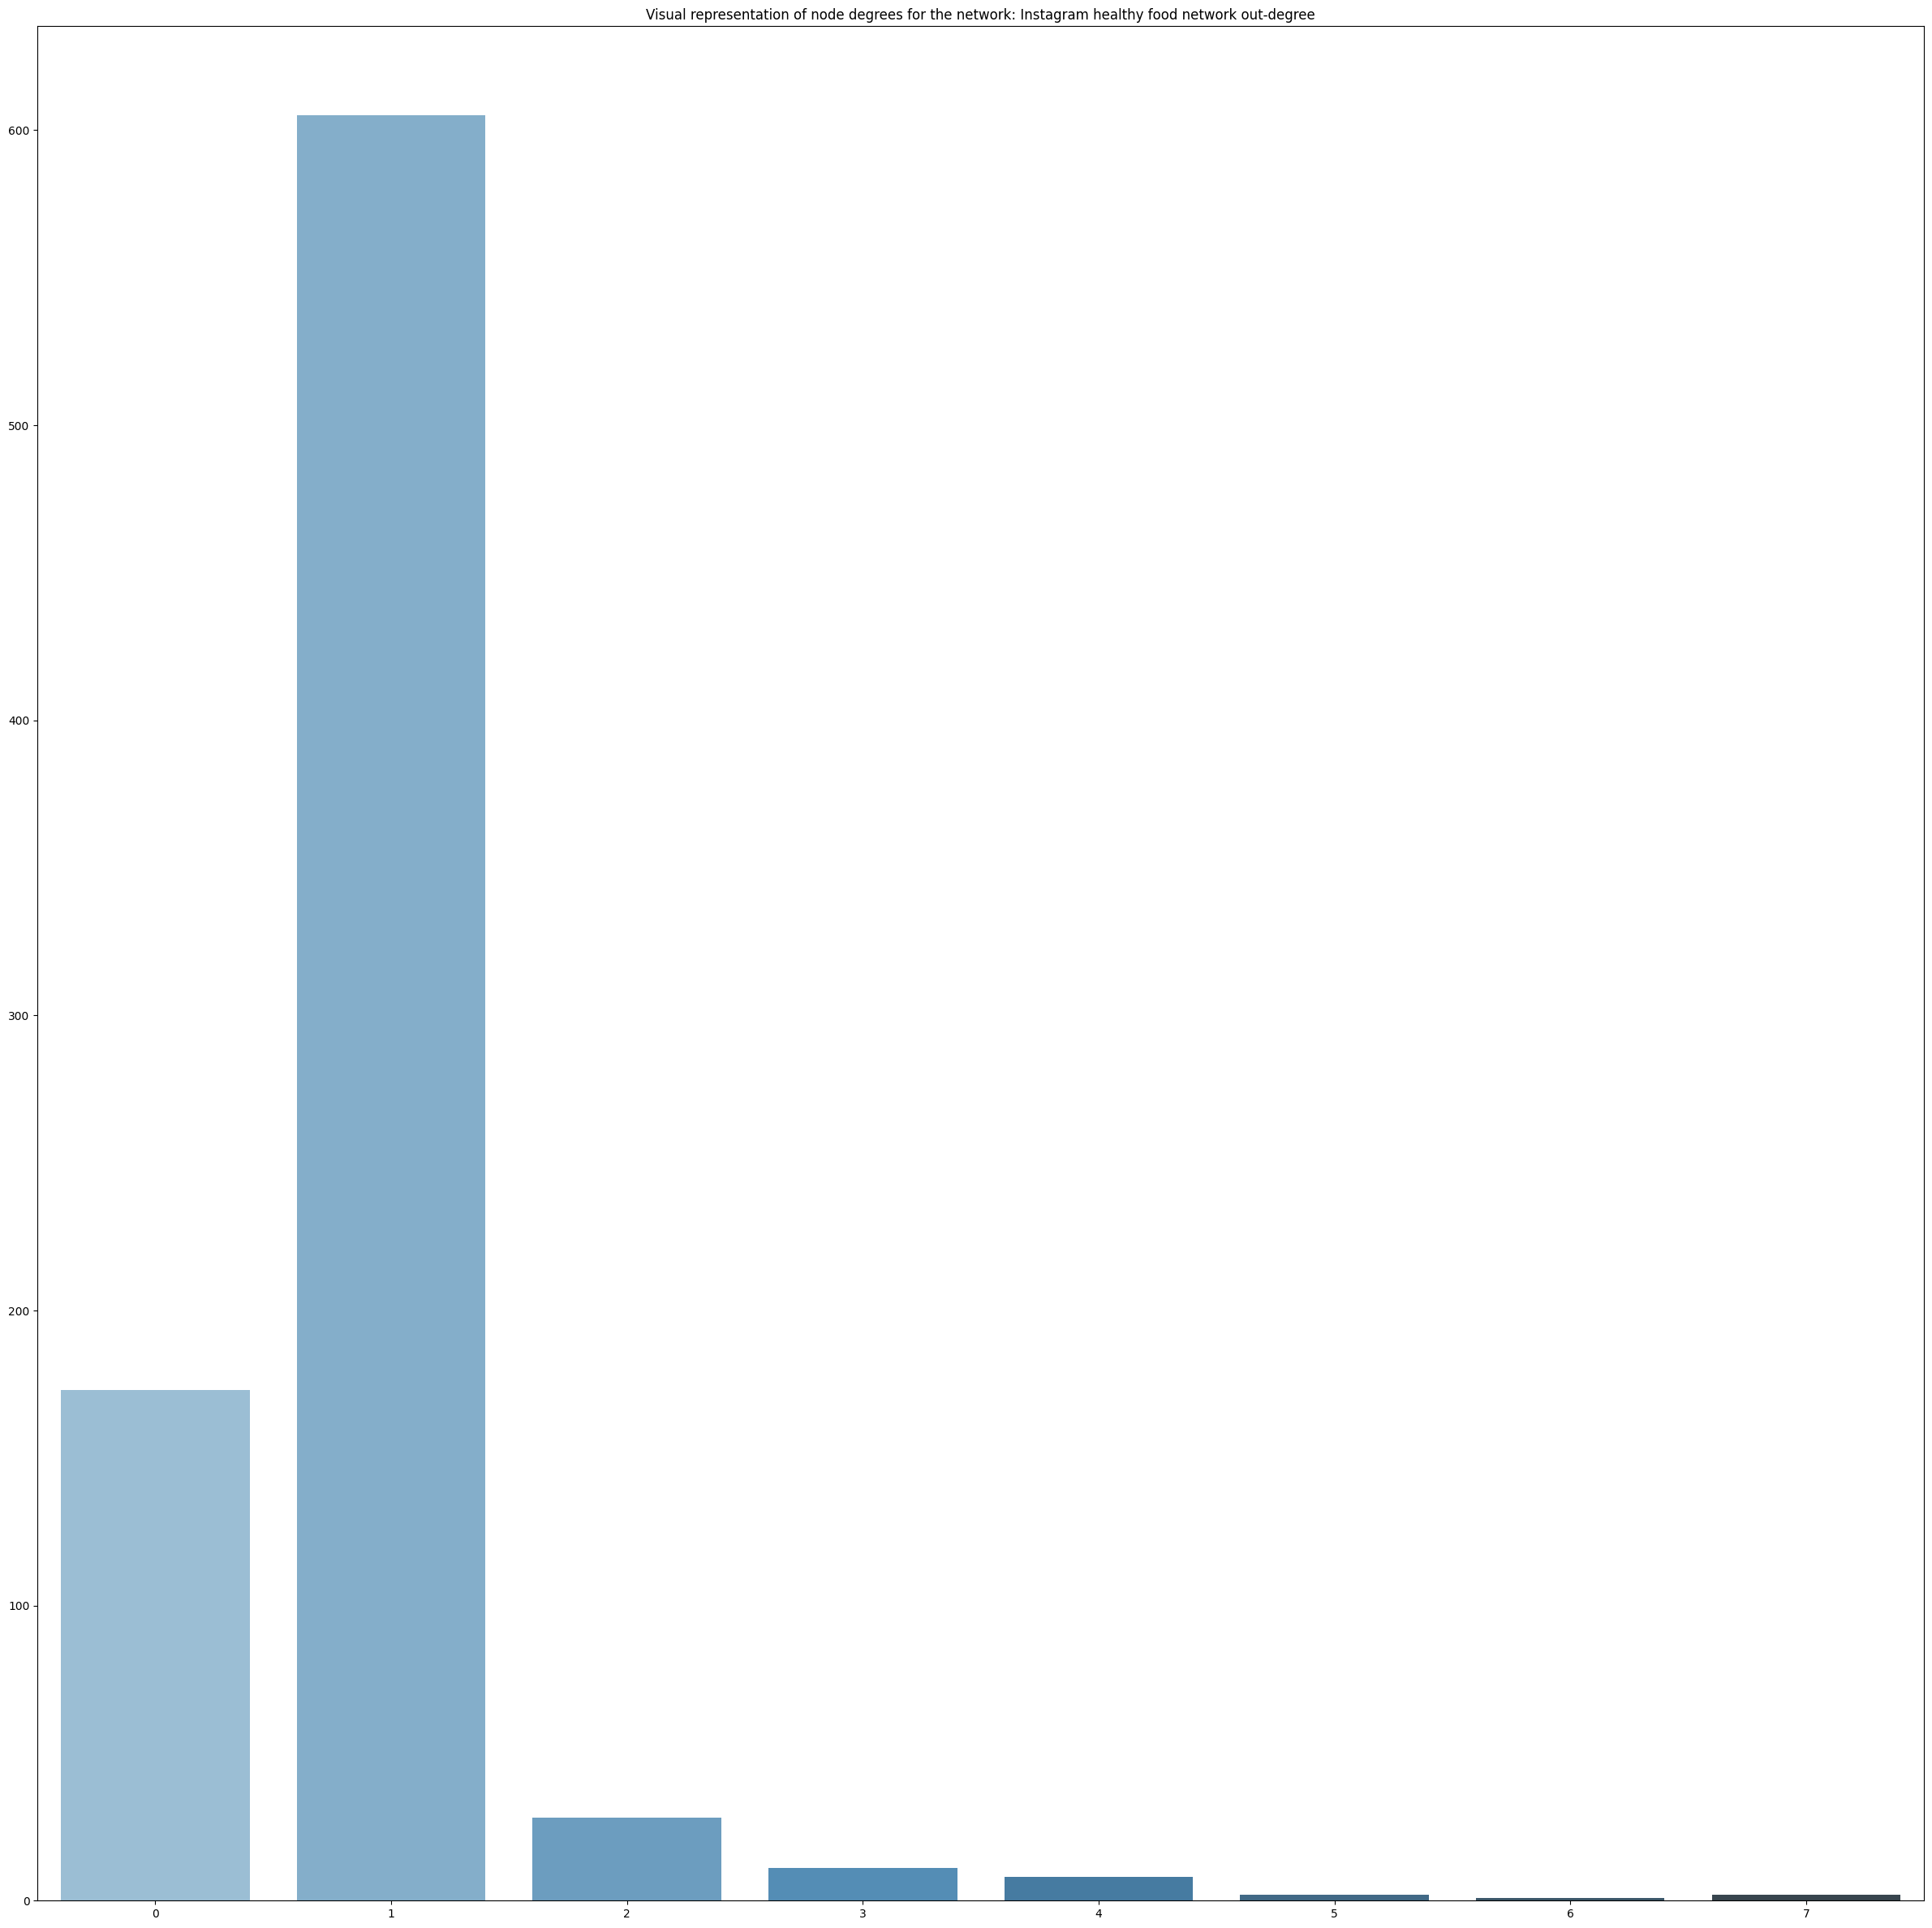

In [8]:
%matplotlib inline
get_graph_statistics_and_visualizations(
        graph,
        'Instagram healthy food network',
        node_size=10,
        figure_size=(30, 30),
        alpha=0.3,
        line_width=0.2,
)

In [9]:
out_degrees = graph.out_degree(nodes)

In [10]:
degrees_only = [d[1] for d in out_degrees]

In [11]:
cutoff_point = 0.95

In [12]:
min_degree = np.quantile(degrees_only, cutoff_point)

In [13]:
min_degree

2.0

In [14]:
influencers = [d[0] for d in out_degrees if d[1] >= min_degree]

In [15]:
influencers

['aldiusa',
 'anotheroutfitpost',
 'anthropologie',
 'beautifulcuisines',
 'bestfoodny',
 'bestofvegan',
 'blondesandcookies',
 'bonappetitmag',
 'buzzfeed',
 'buzzfeedfood',
 'buzzfeedhealth',
 'buzzfeedtasty',
 'cookinglight',
 'eater',
 'food52',
 'food_glooby',
 'foodblogfeed',
 'foodgawker',
 'foodie',
 'foodnetwork',
 'gymshark',
 'gymsharkwomen',
 'healthfood',
 'healthmagazine',
 'healthy_ish',
 'huffposttaste',
 'iamwellandgood',
 'kayla_itsines',
 'kelseywells',
 'liketoknow.it',
 'marksandspencer',
 'menwithclass',
 'mindbodygreen',
 'new_fork_city',
 'nutritionschool',
 'ootdmagazine',
 'prettylittleiiinspo',
 'shape',
 'thechalkboardeats',
 'thechalkboardmag',
 'thefeedfeed',
 'thefeedfeed.glutenfree',
 'thefeedfeed.vegan',
 'thekitchn',
 'thrivemags',
 'traderjoes',
 'veganbowls',
 'wellandgoodeats',
 'wholefoods',
 'wholefoodsont',
 'womenshealthmag',
 'zagat']

In [16]:
len(influencers)

52

In [40]:
model = ThresholdModel(graph, cutoff_point)

In [41]:
influencers, influence_dict = model.calculate_optimal_influencer_set_greedy(1)

In [42]:
len([v for v in influence_dict.values() if v == 1]) / len(nodes) * 100

11.325301204819278

In [43]:
model.sig_a_init / len(nodes) * 100

11.44578313253012

In [44]:
node_colors = ['green' if influence_dict[n] else 'red' for n in nodes]

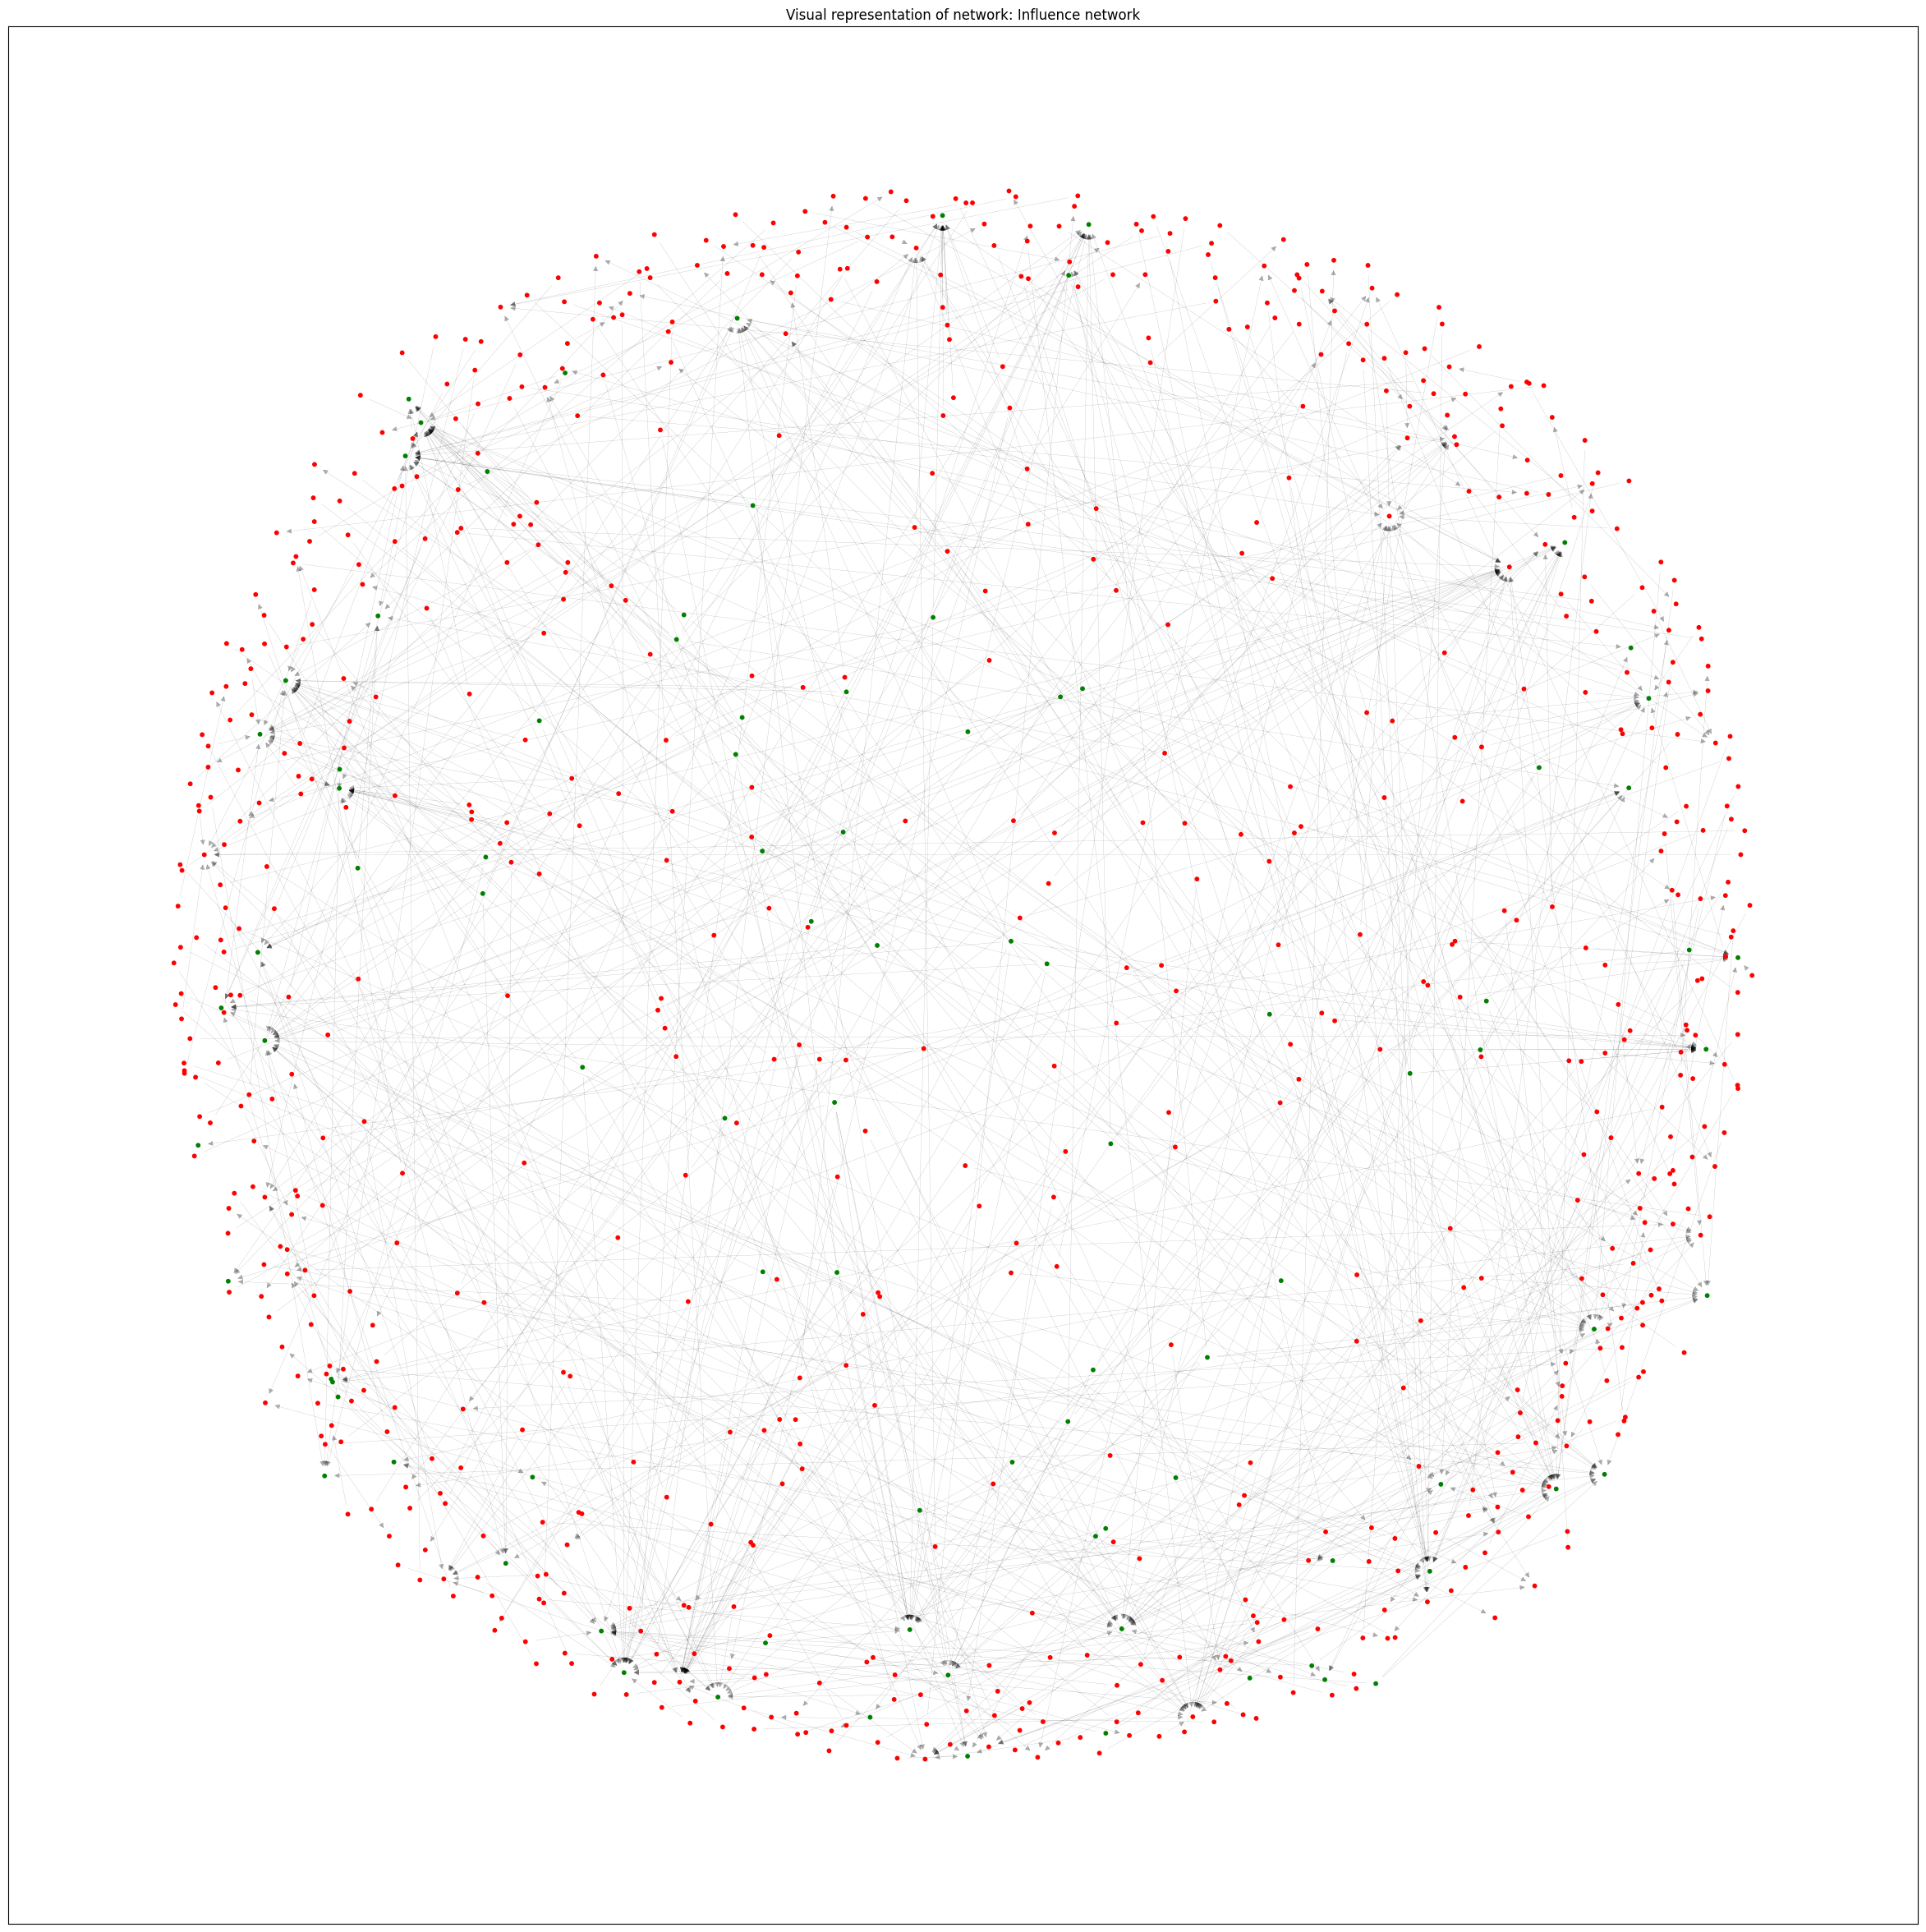

In [45]:
plot_graph(
    graph,
    'Influence network',
    node_size=10,
    figure_size=(30, 30),
    alpha=0.3,
    line_width=0.2,
    node_color=node_colors,
)

In [46]:
influencers

['thechalkboardeats']